In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Open Data</h3>

In [102]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<h3>Analyze Data</h3>

In [103]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [104]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [105]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<h3>Find Missing Values</h3>

In [107]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

We can see we are only missing at most 1-2% of the data.
My first thought was that maybe the same rows just don't have values for a lot of the features giving a similar percentage in missing data.

In [108]:
percent_nan = percent_missing(df_train)
percent_nan

Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Cabin           2.289198
Name            2.300702
HomePlanet      2.312205
VIP             2.335212
ShoppingMall    2.392730
CryoSleep       2.496261
dtype: float64

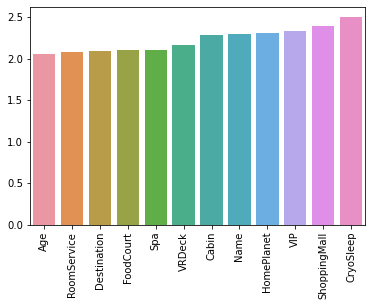

In [109]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

I took the feature VIP, since it is in the middle, to see about how many rows we have missing data, so about 93 give or less

In [110]:
df_train[df_train['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,True
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas Schmondez,False
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent Brakeng,True


<h3>Feature Engineering</h3>

We look at each feature of data missing and see if we can save the data instead of dropping the feature

From the description we can see that the columns RoomService, FoodCourt, ShoppingMall, Spa, VRDeck. Are all bill amounts that each passanger has billed at the Space Titanic. By this we can assume if it's NaN it was probably 0

In [112]:
columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df_train[columns] = df_train[columns].fillna(0)
df_test[columns] = df_train[columns].fillna(0)

Now we can see that it took care of 5 features

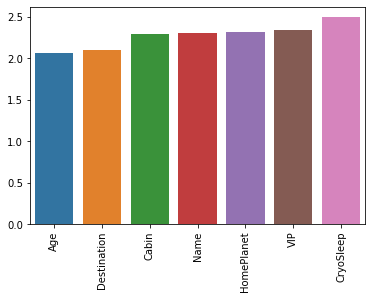

In [113]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Using the same logic, VIP is a True or False value in which the passanger has purchased a VIP ticket. Logically we can fill the NaN values with False, since most likely those passagners did not purchase any.

We can see that only 74 passangers purchase it, and most people did not

In [91]:
df_train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [92]:
df_train['VIP'] = df_train['VIP'].fillna(False)

This can be also applied to CryoSleep as it was a choice if to be put in it or not

In [93]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [114]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(False)

We are left now with only 5 features

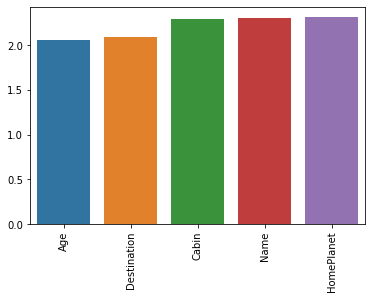

In [95]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

First we look at Home Planet

In [115]:
df_train[df_train['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,0.0,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [116]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

we are missing 87 rows, so what I am thinking is that using passengerId we can find who else the passanger of missing Homeplanet was traveling with. find a percentage of the likely home planet within that group.

For that we can split the passenger id into two features
gggg_pp -> [gggg] instead

In [117]:
df_train['Group'] = df_train['PassengerId'].str.split('_',expand=True)[0]
df_train = df_train.drop(['PassengerId'],axis=1)
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


Now we go back to see how many value counts of home planets within same groups

In [118]:
df_train[df_train['HomePlanet'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
59,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Colatz Keen,True,0064
113,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,0119
186,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,0.0,0.0,0.0,Arraid Inicont,True,0210
225,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,0242
234,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,0251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,9084
8613,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,9194
8666,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,9248
8674,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,9257


It seems, most people are from Earth and that out of the three groups, Earth had a higher percentage of it failing

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

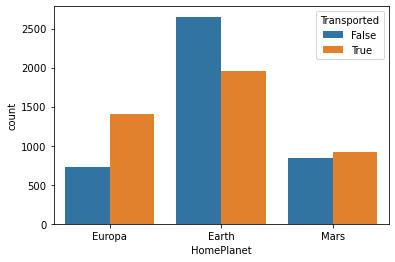

In [121]:
sns.countplot(data=df_train,x='HomePlanet',hue='Transported')